# **PSORIASIS (Allosteric Tyrosine Kinase 2)**

This is a drug discovery Machine Learning Model project created by me for my personal hobby and is based on the tutorial by Data Professor and my previous ML model project. 

Here is the link of his YouTube Channel : https://www.youtube.com/watch?v=plVLRashaA8

and here is the link for the first project:
https://github.com/jeromeslash83/Data-Science/tree/main/Drug%20Discover%20ML%20Model/Alzheimer's%20Disease%20(Amyloid%20Beta)

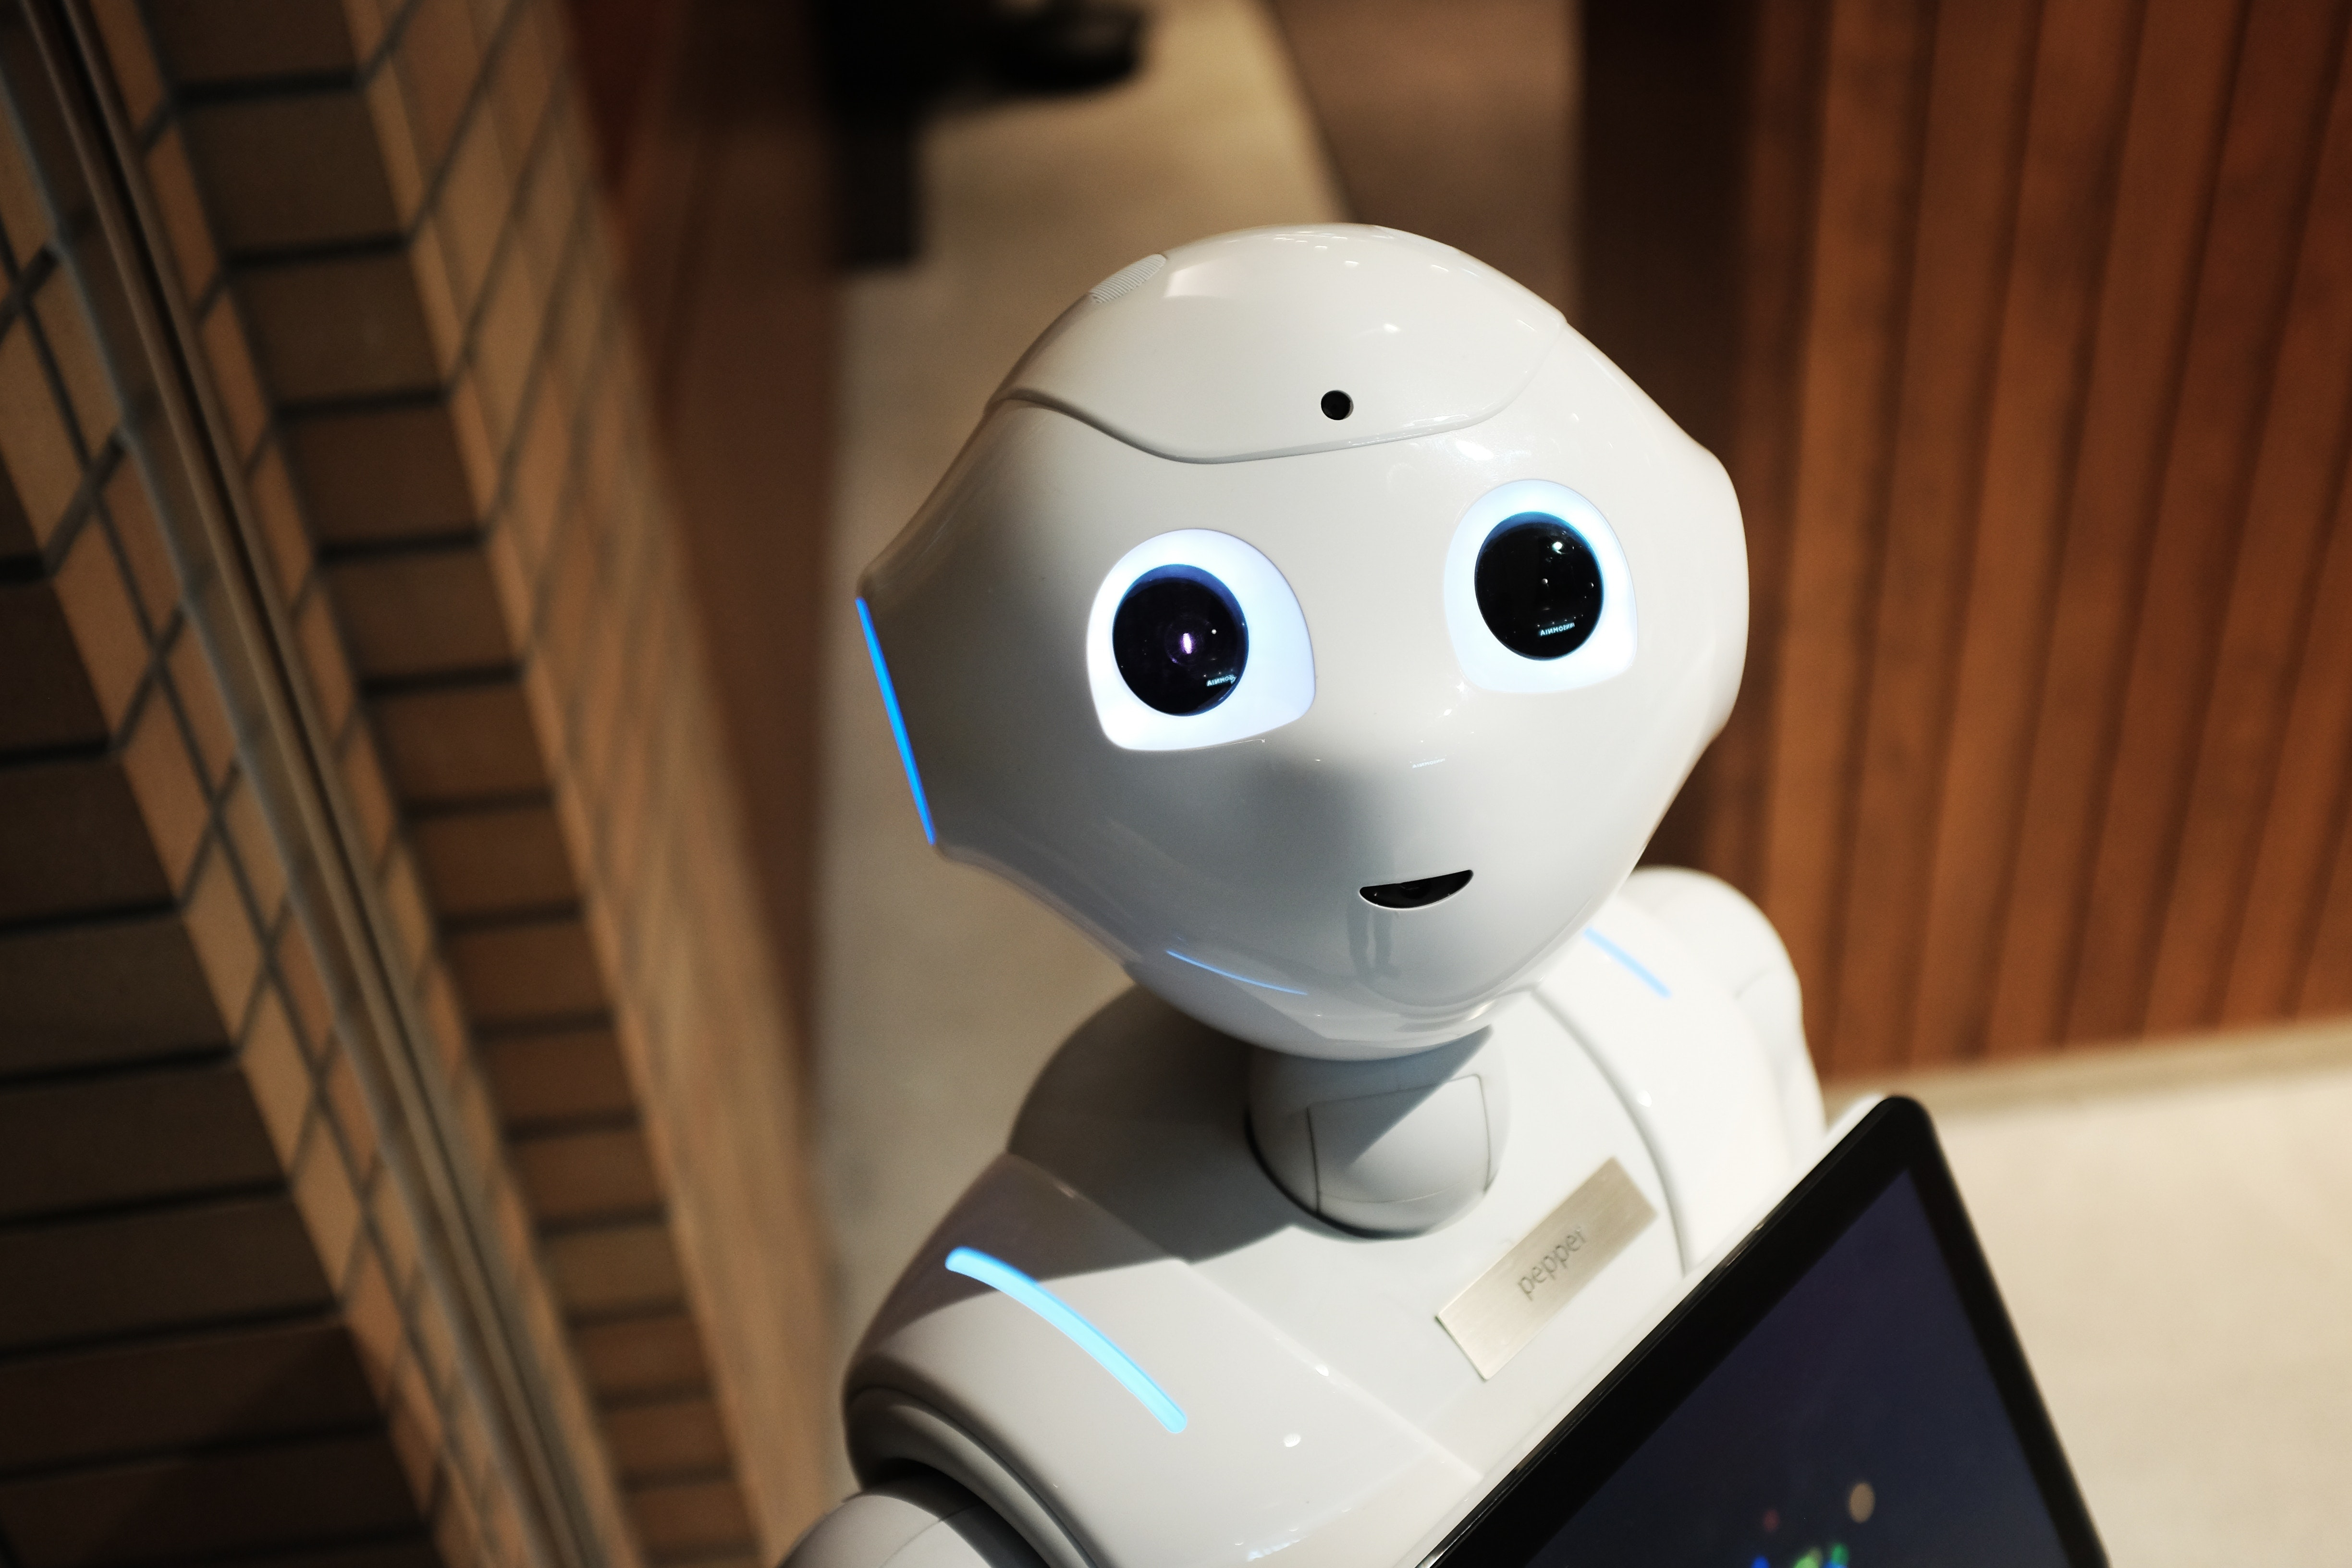



In [1]:
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 KB 6.6 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 22.2.0
    Uninstalling attrs-22.2.0:
      Successfully uninstalled attrs-22.2.0


This will import the python module for the ChEMBL database which will provide  a programmatic interface to the ChEMBL, a large publicly available database of bioactive molecules and drug targets.

In [2]:
#import the dependencies
import pandas as pd
from chembl_webresource_client.new_client import new_client

**This will perform a search for a target database specifically for the term 'Tyrosine Kinase 2' which is an enzyme shown to be central to what causes Psoriasis. It will store the search results in a Pandas DataFrame named 'targets'.**

In [3]:
#Target search for Tyrosine Kinase 2
target = new_client.target
query_target = target.search('tyrosine kinase 2')
targets = pd.DataFrame.from_dict(query_target)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P29597', 'xref_name': None, 'xre...",Homo sapiens,Tyrosine-protein kinase TYK2,25.0,False,CHEMBL3553,"[{'accession': 'P29597', 'component_descriptio...",SINGLE PROTEIN,9606.0
1,[],Homo sapiens,Janus Kinase (JAK),25.0,False,CHEMBL2363062,"[{'accession': 'P52333', 'component_descriptio...",PROTEIN FAMILY,9606.0
2,[],Homo sapiens,JAK1/JAK2/TYK2,25.0,False,CHEMBL3301390,"[{'accession': 'P23458', 'component_descriptio...",PROTEIN COMPLEX,9606.0
3,[],Homo sapiens,JAK1/TYK2,25.0,False,CHEMBL3301391,"[{'accession': 'P23458', 'component_descriptio...",PROTEIN COMPLEX,9606.0
4,[],Homo sapiens,JAK2/TYK2,25.0,False,CHEMBL3301392,"[{'accession': 'O60674', 'component_descriptio...",PROTEIN COMPLEX,9606.0
...,...,...,...,...,...,...,...,...,...
3802,[],Homo sapiens,20S proteasome,0.0,False,CHEMBL3831201,"[{'accession': 'P49721', 'component_descriptio...",PROTEIN COMPLEX,9606.0
3803,[],Mus musculus,Glutamate NMDA receptor,0.0,False,CHEMBL3832634,"[{'accession': 'P35436', 'component_descriptio...",PROTEIN COMPLEX GROUP,10090.0
3804,[],Rattus norvegicus,Voltage-gated sodium channel,0.0,False,CHEMBL3988641,"[{'accession': 'O88457', 'component_descriptio...",PROTEIN FAMILY,10116.0
3805,[],Mycobacterium tuberculosis,Phosphotyrosine protein phosphatase,0.0,False,CHEMBL4295521,"[{'accession': 'A0A045ISB3', 'component_descri...",SINGLE PROTEIN,1773.0


**The first entry in the search will be selected assigned into the *'selected_target'* variable as in some papers and drugs treatments for psoriasis, this is the enzyme being targeted.**

In [4]:
#The selected target will be the 1st entry in the dataset 
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL3553'

**The Bioactivity data for the target protein TYK2 enzyme will be filtered based on the IC50 (concentration of a drug that is required to inhibit 50% of the biological activity of a target protein (enzyme, receptor etc) and stored as a Pandas DataFrame object 'df'.**



In [5]:
#The Bioactivity data will be retrieved.
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type='IC50')

In [6]:
df = pd.DataFrame.from_dict(res)
df.head()

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,129354,[],CHEMBL819923,"Inhibition of Tyrosine kinase 2 kinase, tyk-2",B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Tyrosine-protein kinase TYK2,9606,None,None,IC50,uM,UO_0000065,None,10.0
1,None,506158,[],CHEMBL819922,Inhibition of Tyrosine kinase 2 kinase,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Tyrosine-protein kinase TYK2,9606,None,None,IC50,uM,UO_0000065,None,0.001
2,None,1663215,[],CHEMBL863896,Inhibitory activity against TYK2,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Tyrosine-protein kinase TYK2,9606,None,None,IC50,uM,UO_0000065,None,25.0
3,None,1765466,[],CHEMBL871539,Inhibition of Tyk2 by HTRF kinase assay,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Tyrosine-protein kinase TYK2,9606,None,None,IC50,uM,UO_0000065,None,2.73
4,None,1765494,[],CHEMBL871539,Inhibition of Tyk2 by HTRF kinase assay,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Tyrosine-protein kinase TYK2,9606,None,None,IC50,uM,UO_0000065,None,1.83


In [7]:
df.shape

(1986, 45)

**The resulting data will be saved as a csv file.**

In [8]:
df.to_csv('TK2_raw.csv', index=False)

**Handling of Missing Data**

In [9]:
#filters missing data to only include only non-null values in the standard_value and canonical_smiles columns
df2 = df[df.standard_value.notna() & df.canonical_smiles.notna()]
df2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,129354,[],CHEMBL819923,"Inhibition of Tyrosine kinase 2 kinase, tyk-2",B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Tyrosine-protein kinase TYK2,9606,None,None,IC50,uM,UO_0000065,None,10.0
1,None,506158,[],CHEMBL819922,Inhibition of Tyrosine kinase 2 kinase,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Tyrosine-protein kinase TYK2,9606,None,None,IC50,uM,UO_0000065,None,0.001
2,None,1663215,[],CHEMBL863896,Inhibitory activity against TYK2,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Tyrosine-protein kinase TYK2,9606,None,None,IC50,uM,UO_0000065,None,25.0
3,None,1765466,[],CHEMBL871539,Inhibition of Tyk2 by HTRF kinase assay,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Tyrosine-protein kinase TYK2,9606,None,None,IC50,uM,UO_0000065,None,2.73
4,None,1765494,[],CHEMBL871539,Inhibition of Tyk2 by HTRF kinase assay,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Tyrosine-protein kinase TYK2,9606,None,None,IC50,uM,UO_0000065,None,1.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,None,24416453,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5047429,Inhibition of human TYK2 (888 to 1178 residues...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Tyrosine-protein kinase TYK2,9606,None,None,pIC50,None,UO_0000065,None,7.0
1982,None,24416454,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5047429,Inhibition of human TYK2 (888 to 1178 residues...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Tyrosine-protein kinase TYK2,9606,None,None,pIC50,None,UO_0000065,None,7.0
1983,None,24416455,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5047429,Inhibition of human TYK2 (888 to 1178 residues...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Tyrosine-protein kinase TYK2,9606,None,None,pIC50,None,UO_0000065,None,6.9
1984,None,24416456,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5047429,Inhibition of human TYK2 (888 to 1178 residues...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Tyrosine-protein kinase TYK2,9606,None,None,pIC50,None,UO_0000065,None,7.7


In [10]:
#check for unique rows
len(df2.canonical_smiles.unique())

1636

**Removing all the duplicates**

In [11]:
#this will remove all the duplicate values in the canonical_smiles column
df2_minus_dup = df2.drop_duplicates(['canonical_smiles'])
df2_minus_dup.head()

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,129354,[],CHEMBL819923,"Inhibition of Tyrosine kinase 2 kinase, tyk-2",B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Tyrosine-protein kinase TYK2,9606,None,None,IC50,uM,UO_0000065,None,10.0
1,None,506158,[],CHEMBL819922,Inhibition of Tyrosine kinase 2 kinase,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Tyrosine-protein kinase TYK2,9606,None,None,IC50,uM,UO_0000065,None,0.001
2,None,1663215,[],CHEMBL863896,Inhibitory activity against TYK2,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Tyrosine-protein kinase TYK2,9606,None,None,IC50,uM,UO_0000065,None,25.0
3,None,1765466,[],CHEMBL871539,Inhibition of Tyk2 by HTRF kinase assay,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Tyrosine-protein kinase TYK2,9606,None,None,IC50,uM,UO_0000065,None,2.73
4,None,1765494,[],CHEMBL871539,Inhibition of Tyk2 by HTRF kinase assay,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Tyrosine-protein kinase TYK2,9606,None,None,IC50,uM,UO_0000065,None,1.83


In [12]:
df2_minus_dup.shape

(1636, 45)

**Combining all the classes from the 'selection' variable and Preprocessing of the raw data**




In [13]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_minus_dup[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL319556,O=C1NCc2c(-c3ccc(F)cc3F)cc(C3CCNCC3)cc2N1c1c(C...,10000.0
1,CHEMBL21156,CC(C)(C)c1nc2c3ccc(F)cc3c3c(=O)[nH]ccc3c2[nH]1,1.0
2,CHEMBL197603,COc1cc(-c2nn([C@H]3CC[C@H](N4CCN(C(C)=O)CC4)CC...,25000.0
3,CHEMBL386661,CNc1ncc2cc(-c3cc(C(=O)Nc4cc(C(F)(F)F)ccc4OC4CC...,2730.0
4,CHEMBL215943,Cc1ccc(C(=O)Nc2cccc(C(F)(F)F)c2)cc1-c1ccc2nc(N...,1830.0
...,...,...,...
1981,CHEMBL5075673,CCc1cc(O)c(F)cc1-c1cc(N[C@@H]2C[C@H]3CC[C@@H](...,100.0
1982,CHEMBL5076101,CCc1cc(O)c(F)cc1-c1cc(N[C@@H](C)CO)c2nc(NCCCN(...,100.0
1983,CHEMBL5094089,CCc1cc(O)c(F)cc1-c1cc(N[C@@H](C)CO)c2nc(NCCOCC...,125.89
1984,CHEMBL5075556,CCc1cc(O)c(F)cc1-c1cc(N[C@@H](C)CO)c2nc(NCCCCC...,19.95


**Save data**

In [14]:
df3.to_csv('TK2_preprocessed01.csv', index=False)

In [15]:
#load saved data
df4 = pd.read_csv('TK2_preprocessed01.csv')

**Making a bioactivity class column for the data which classifies if the compound is either 'active', 'inactive' or 'intermediate'.**


In [18]:
#classifies the bioactivity of the compound by its standard value.
bioactivity_threshold = ["inactive" if float(i) >= 10000 else "active" if float(i) <= 1000 else "intermediate" for i in df4.standard_value]

In [19]:
#converting the bioactivity class as a Pandas Dataframe and contatenating the DataFrame to the previous data
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL319556,O=C1NCc2c(-c3ccc(F)cc3F)cc(C3CCNCC3)cc2N1c1c(C...,10000.00,inactive
1,CHEMBL21156,CC(C)(C)c1nc2c3ccc(F)cc3c3c(=O)[nH]ccc3c2[nH]1,1.00,active
2,CHEMBL197603,COc1cc(-c2nn([C@H]3CC[C@H](N4CCN(C(C)=O)CC4)CC...,25000.00,inactive
3,CHEMBL386661,CNc1ncc2cc(-c3cc(C(=O)Nc4cc(C(F)(F)F)ccc4OC4CC...,2730.00,intermediate
4,CHEMBL215943,Cc1ccc(C(=O)Nc2cccc(C(F)(F)F)c2)cc1-c1ccc2nc(N...,1830.00,intermediate
...,...,...,...,...
1631,CHEMBL5075673,CCc1cc(O)c(F)cc1-c1cc(N[C@@H]2C[C@H]3CC[C@@H](...,100.00,active
1632,CHEMBL5076101,CCc1cc(O)c(F)cc1-c1cc(N[C@@H](C)CO)c2nc(NCCCN(...,100.00,active
1633,CHEMBL5094089,CCc1cc(O)c(F)cc1-c1cc(N[C@@H](C)CO)c2nc(NCCOCC...,125.89,active
1634,CHEMBL5075556,CCc1cc(O)c(F)cc1-c1cc(N[C@@H](C)CO)c2nc(NCCCCC...,19.95,active


# **Save the Preprocessed data to csv**

In [20]:
df5.to_csv('TK2_preprocessed02.csv', index=False)

# **Part 2 of the Psoriasis Drug Discovery Machine Learning Model**

Descriptor calculation and Exploratory Data analysis.

In [21]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-03-03 01:44:22--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   196MB/s    in 0.4s    

2023-03-03 01:44:23 (196 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [22]:
df6 = pd.read_csv('TK2_preprocessed02.csv')
df6.head()

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL319556,O=C1NCc2c(-c3ccc(F)cc3F)cc(C3CCNCC3)cc2N1c1c(C...,10000.0,inactive
1,CHEMBL21156,CC(C)(C)c1nc2c3ccc(F)cc3c3c(=O)[nH]ccc3c2[nH]1,1.0,active
2,CHEMBL197603,COc1cc(-c2nn([C@H]3CC[C@H](N4CCN(C(C)=O)CC4)CC...,25000.0,inactive
3,CHEMBL386661,CNc1ncc2cc(-c3cc(C(=O)Nc4cc(C(F)(F)F)ccc4OC4CC...,2730.0,intermediate
4,CHEMBL215943,Cc1ccc(C(=O)Nc2cccc(C(F)(F)F)c2)cc1-c1ccc2nc(N...,1830.0,intermediate


In [23]:
df6.shape

(1636, 4)

**Remove the 'canonical_smiles' column from the dataset and insert it into the last row.**

In [24]:
# create a modified 'canonical_smiles' column that contains the longest SMILES string from the original column
df_modified = df6.assign(canonical_smiles=df6['canonical_smiles'].str.split('.').apply(lambda x: max(x, key=len)))

# drop the original 'canonical_smiles' column and concatenate the modified column as the last column
df_clean_smiles = df_modified.drop(columns=['canonical_smiles']).join(df6['canonical_smiles'].str.split('.').apply(lambda x: max(x, key=len)))

df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL319556,10000.00,inactive,O=C1NCc2c(-c3ccc(F)cc3F)cc(C3CCNCC3)cc2N1c1c(C...
1,CHEMBL21156,1.00,active,CC(C)(C)c1nc2c3ccc(F)cc3c3c(=O)[nH]ccc3c2[nH]1
2,CHEMBL197603,25000.00,inactive,COc1cc(-c2nn([C@H]3CC[C@H](N4CCN(C(C)=O)CC4)CC...
3,CHEMBL386661,2730.00,intermediate,CNc1ncc2cc(-c3cc(C(=O)Nc4cc(C(F)(F)F)ccc4OC4CC...
4,CHEMBL215943,1830.00,intermediate,Cc1ccc(C(=O)Nc2cccc(C(F)(F)F)c2)cc1-c1ccc2nc(N...
...,...,...,...,...
1631,CHEMBL5075673,100.00,active,CCc1cc(O)c(F)cc1-c1cc(N[C@@H]2C[C@H]3CC[C@@H](...
1632,CHEMBL5076101,100.00,active,CCc1cc(O)c(F)cc1-c1cc(N[C@@H](C)CO)c2nc(NCCCN(...
1633,CHEMBL5094089,125.89,active,CCc1cc(O)c(F)cc1-c1cc(N[C@@H](C)CO)c2nc(NCCOCC...
1634,CHEMBL5075556,19.95,active,CCc1cc(O)c(F)cc1-c1cc(N[C@@H](C)CO)c2nc(NCCCCC...


# **Calculation of Lipinski descriptors**

Lipinski's rule of five is a guideline used to determine if a chemical compound with a certain pharmacological or biological activity is likely to be an orally active drug in humans. The rule is based on the observation that most orally administered drugs are relatively small and moderately lipophilic molecules. The rule states that an orally active drug has no more than one violation of criteria such as:

1.   Having no more than 5 hydrogen bond donors (total number of nitrogen–hydrogen and oxygen–hydrogen bonds).
2.   No more than 10 hydrogen bond acceptors.
3.   A molecular mass less than 500 daltons; and
4.   A calculated octanol-water partition coefficient (Clog P or LogP) that does not exceed 5

Although the rule has been highly influential in drug discovery, only about 50% of orally administered new chemical entities actually conform to it. Exceptions to the rule have also been observed, such as with some natural products.

But for this project we will use this rule.

[**Check out the Wikipedia link for more info.**](https://en.wikipedia.org/wiki/Lipinski%27s_rule_of_five)

In [25]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import numpy as np

 **Calculate the Lipinski Descriptors**

In [29]:
#This based and refactored from Data Professor's lipinski function.

def lipinski(smiles, verbose=False):
    """
    Calculates Lipinski's Rule of Five descriptors from a list of SMILES strings.
    """
    # Convert SMILES strings to RDKit molecules
    mols = [Chem.MolFromSmiles(smi) for smi in smiles]
    
    # Initialize array to store descriptor values
    descriptors = np.zeros((len(mols), 4))
    
    # Loop over molecules and calculate descriptors
    for i, mol in enumerate(mols):
        descriptors[i, 0] = Descriptors.MolWt(mol)  # Molecular weight
        descriptors[i, 1] = Descriptors.MolLogP(mol)  # LogP
        descriptors[i, 2] = Lipinski.NumHDonors(mol)  # Number of hydrogen bond donors
        descriptors[i, 3] = Lipinski.NumHAcceptors(mol)  # Number of hydrogen bond acceptors
    
    # Create Pandas DataFrame to store descriptor values and return it
    column_names = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
    descriptors_df = pd.DataFrame(data=descriptors, columns=column_names)
    return descriptors_df

In [30]:
#run the function on df_clean_smiles.
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,488.365,6.76690,2.0,2.0
1,309.344,3.99420,2.0,2.0
2,621.746,4.47590,2.0,10.0
3,549.597,6.39102,2.0,6.0
4,535.570,5.62042,2.0,6.0
...,...,...,...,...
1631,407.493,3.98100,4.0,6.0
1632,441.551,3.86020,4.0,7.0
1633,471.577,3.48670,4.0,8.0
1634,469.605,4.64040,4.0,7.0


**Combining the dataframes**

Take a look at the two dataframes that will be combined.

In [31]:
df_lipinski, df6

(           MW     LogP  NumHDonors  NumHAcceptors
 0     488.365  6.76690         2.0            2.0
 1     309.344  3.99420         2.0            2.0
 2     621.746  4.47590         2.0           10.0
 3     549.597  6.39102         2.0            6.0
 4     535.570  5.62042         2.0            6.0
 ...       ...      ...         ...            ...
 1631  407.493  3.98100         4.0            6.0
 1632  441.551  3.86020         4.0            7.0
 1633  471.577  3.48670         4.0            8.0
 1634  469.605  4.64040         4.0            7.0
 1635  372.400  2.37210         5.0            6.0
 
 [1636 rows x 4 columns],
      molecule_chembl_id                                   canonical_smiles  \
 0          CHEMBL319556  O=C1NCc2c(-c3ccc(F)cc3F)cc(C3CCNCC3)cc2N1c1c(C...   
 1           CHEMBL21156     CC(C)(C)c1nc2c3ccc(F)cc3c3c(=O)[nH]ccc3c2[nH]1   
 2          CHEMBL197603  COc1cc(-c2nn([C@H]3CC[C@H](N4CCN(C(C)=O)CC4)CC...   
 3          CHEMBL386661  CNc1ncc2cc(-c3cc(C

In [32]:
#combine the 2 DataFrames
df_combined = pd.concat([df6,df_lipinski], axis=1)
df_combined.head()

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL319556,O=C1NCc2c(-c3ccc(F)cc3F)cc(C3CCNCC3)cc2N1c1c(C...,10000.0,inactive,488.365,6.76690,2.0,2.0
1,CHEMBL21156,CC(C)(C)c1nc2c3ccc(F)cc3c3c(=O)[nH]ccc3c2[nH]1,1.0,active,309.344,3.99420,2.0,2.0
2,CHEMBL197603,COc1cc(-c2nn([C@H]3CC[C@H](N4CCN(C(C)=O)CC4)CC...,25000.0,inactive,621.746,4.47590,2.0,10.0
3,CHEMBL386661,CNc1ncc2cc(-c3cc(C(=O)Nc4cc(C(F)(F)F)ccc4OC4CC...,2730.0,intermediate,549.597,6.39102,2.0,6.0
4,CHEMBL215943,Cc1ccc(C(=O)Nc2cccc(C(F)(F)F)c2)cc1-c1ccc2nc(N...,1830.0,intermediate,535.570,5.62042,2.0,6.0


# **Converting IC50 to pIC50**

The **IC50** (half-maximal inhibitory concentration) will be converted to **pIC50** (negative logarithmic transformation of the IC50 value) so that the data can be uniformly distributed and make comparisons easier between compounds. Statistical analysis will also be more suitable for this kind of data.

In [33]:
#create two functions: 1 function converts IC50 to pIC50, and the other one normalizes the standard_value_norm column

def pIC50(input):
    """
    Calculates pIC50 values from standard_value_norm column and adds it to the input DataFrame.
    """
    input['pIC50'] = -np.log10(input['standard_value_norm'] * 10**-9)  # Calculate pIC50 and add column to input DataFrame
    return input.drop(columns='standard_value_norm')  # Drop standard_value_norm column and return modified DataFrame

# Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.
def norm_value(input):
    """
    Normalizes standard_value column in input DataFrame by capping values above 100,000,000 and adding
    a new column called standard_value_norm to the input DataFrame with the normalized values.
    """
    input['standard_value_norm'] = np.minimum(input['standard_value'], 100000000)  # Cap values above 100,000,000 and add column to input DataFrame
    return input.drop(columns='standard_value')  # Drop standard_value column and return modified DataFrame

In [34]:
df_combined.standard_value.describe()

count      1636.000000
mean       6118.188381
std       28296.489987
min           0.190000
25%          52.000000
50%         309.000000
75%        1000.000000
max      200000.000000
Name: standard_value, dtype: float64

In [35]:
#Normalize the standard_value of the data first
df_norm = norm_value(df_combined)
df_norm.head()

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL319556,O=C1NCc2c(-c3ccc(F)cc3F)cc(C3CCNCC3)cc2N1c1c(C...,inactive,488.365,6.76690,2.0,2.0,10000.0
1,CHEMBL21156,CC(C)(C)c1nc2c3ccc(F)cc3c3c(=O)[nH]ccc3c2[nH]1,active,309.344,3.99420,2.0,2.0,1.0
2,CHEMBL197603,COc1cc(-c2nn([C@H]3CC[C@H](N4CCN(C(C)=O)CC4)CC...,inactive,621.746,4.47590,2.0,10.0,25000.0
3,CHEMBL386661,CNc1ncc2cc(-c3cc(C(=O)Nc4cc(C(F)(F)F)ccc4OC4CC...,intermediate,549.597,6.39102,2.0,6.0,2730.0
4,CHEMBL215943,Cc1ccc(C(=O)Nc2cccc(C(F)(F)F)c2)cc1-c1ccc2nc(N...,intermediate,535.570,5.62042,2.0,6.0,1830.0


In [36]:
df_norm.standard_value_norm.describe()

count      1636.000000
mean       6118.188381
std       28296.489987
min           0.190000
25%          52.000000
50%         309.000000
75%        1000.000000
max      200000.000000
Name: standard_value_norm, dtype: float64

In [37]:
#convert IC50 to pIC50
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL319556,O=C1NCc2c(-c3ccc(F)cc3F)cc(C3CCNCC3)cc2N1c1c(C...,inactive,488.365,6.76690,2.0,2.0,5.000000
1,CHEMBL21156,CC(C)(C)c1nc2c3ccc(F)cc3c3c(=O)[nH]ccc3c2[nH]1,active,309.344,3.99420,2.0,2.0,9.000000
2,CHEMBL197603,COc1cc(-c2nn([C@H]3CC[C@H](N4CCN(C(C)=O)CC4)CC...,inactive,621.746,4.47590,2.0,10.0,4.602060
3,CHEMBL386661,CNc1ncc2cc(-c3cc(C(=O)Nc4cc(C(F)(F)F)ccc4OC4CC...,intermediate,549.597,6.39102,2.0,6.0,5.563837
4,CHEMBL215943,Cc1ccc(C(=O)Nc2cccc(C(F)(F)F)c2)cc1-c1ccc2nc(N...,intermediate,535.570,5.62042,2.0,6.0,5.737549
...,...,...,...,...,...,...,...,...
1631,CHEMBL5075673,CCc1cc(O)c(F)cc1-c1cc(N[C@@H]2C[C@H]3CC[C@@H](...,active,407.493,3.98100,4.0,6.0,7.000000
1632,CHEMBL5076101,CCc1cc(O)c(F)cc1-c1cc(N[C@@H](C)CO)c2nc(NCCCN(...,active,441.551,3.86020,4.0,7.0,7.000000
1633,CHEMBL5094089,CCc1cc(O)c(F)cc1-c1cc(N[C@@H](C)CO)c2nc(NCCOCC...,active,471.577,3.48670,4.0,8.0,6.900009
1634,CHEMBL5075556,CCc1cc(O)c(F)cc1-c1cc(N[C@@H](C)CO)c2nc(NCCCCC...,active,469.605,4.64040,4.0,7.0,7.700057


In [38]:
df_final.pIC50.describe()

count    1636.000000
mean        6.571759
std         1.128007
min         3.698970
25%         6.000000
50%         6.510044
75%         7.283997
max         9.721246
Name: pIC50, dtype: float64

In [39]:
#save to csv
df_final.to_csv('TK2_JAK1_04_bioactivity_data_3class_pIC50.csv')

**Removing the rows with intermediate bioactivity class**

I will be removing the indermediate bioactivity class for the model building part but I will still be doing data exploration with it for this part.

In [40]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL319556,O=C1NCc2c(-c3ccc(F)cc3F)cc(C3CCNCC3)cc2N1c1c(C...,inactive,488.365,6.7669,2.0,2.0,5.000000
1,CHEMBL21156,CC(C)(C)c1nc2c3ccc(F)cc3c3c(=O)[nH]ccc3c2[nH]1,active,309.344,3.9942,2.0,2.0,9.000000
2,CHEMBL197603,COc1cc(-c2nn([C@H]3CC[C@H](N4CCN(C(C)=O)CC4)CC...,inactive,621.746,4.4759,2.0,10.0,4.602060
7,CHEMBL495727,O=C(Nc1c[nH]nc1-c1nc2ccc(CN3CCOCC3)cc2[nH]1)NC...,active,381.440,2.0691,4.0,5.0,9.000000
8,CHEMBL585927,CNc1ccn(-c2ccccc2)c(=O)c1C(=O)Nc1ccc(Oc2ccnc3c...,active,523.549,4.8842,2.0,9.0,6.000000
...,...,...,...,...,...,...,...,...
1631,CHEMBL5075673,CCc1cc(O)c(F)cc1-c1cc(N[C@@H]2C[C@H]3CC[C@@H](...,active,407.493,3.9810,4.0,6.0,7.000000
1632,CHEMBL5076101,CCc1cc(O)c(F)cc1-c1cc(N[C@@H](C)CO)c2nc(NCCCN(...,active,441.551,3.8602,4.0,7.0,7.000000
1633,CHEMBL5094089,CCc1cc(O)c(F)cc1-c1cc(N[C@@H](C)CO)c2nc(NCCOCC...,active,471.577,3.4867,4.0,8.0,6.900009
1634,CHEMBL5075556,CCc1cc(O)c(F)cc1-c1cc(N[C@@H](C)CO)c2nc(NCCCCC...,active,469.605,4.6404,4.0,7.0,7.700057


**Undersampling the data population to n=432 to avoid extremely skewing the dataset to the active class. This decision is based on previous tinkering with the data since the original data is extremely skewed to the active class of compounds**

In [45]:
from sklearn.utils import resample

#separate the major and minor datasets based on class
majority_class = df_2class[df_2class['class'] == 'active']
minority_class = df_2class[df_2class['class'] == 'inactive']

#undersample the active class
undersampled_majority_class = resample(majority_class,replace=False, n_samples=250,random_state=42)

# Combine the undersampled majority class with the minority class
undersampled_data = pd.concat([undersampled_majority_class, minority_class])

undersampled_data

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1578,CHEMBL5076717,Cn1cc(Nc2nccc(N3CCC4(CCNC4=O)CC3)n2)cn1,active,327.392,1.06020,2.0,7.0,6.000000
1137,CHEMBL4285841,CNc1cc(Nc2cccc3c2OCCO3)nn2c(C(=O)NC3CC3)cnc12,active,380.408,2.17800,3.0,8.0,8.221849
738,CHEMBL3892159,CC1CC1NC[C@H]1CC[C@H](c2nnn3cnc4[nH]ccc4c23)CC1,active,324.432,2.87740,2.0,5.0,6.853872
550,CHEMBL3950680,Fc1ccc(CNC[C@H]2CC[C@H](c3nnn4cnc5[nH]ccc5c34)...,active,446.452,4.82710,2.0,5.0,8.481486
611,CHEMBL3962232,OCCOc1ccc(CN2CCC(c3nnn4cnc5[nH]ccc5c34)CC2)cc1,active,392.463,2.35630,2.0,7.0,6.000000
...,...,...,...,...,...,...,...,...
1414,CHEMBL4799683,Cn1cc(-c2cc(-c3cnn(C4(CC#N)CN(CC(F)(F)F)C4)c3)...,inactive,441.421,2.48018,0.0,9.0,5.000000
1448,CHEMBL4792719,COc1cccc(CN2CCC(Nc3c(C(=O)NC4CC4)cnc4[nH]ccc34...,inactive,419.529,3.54020,3.0,5.0,5.000000
1449,CHEMBL4784576,COc1cccc(CN2CCC(Nc3c(C(=O)NC4CCCC4)cnc4[nH]ccc...,inactive,447.583,4.32040,3.0,5.0,5.000000
1483,CHEMBL3651854,Cc1cc(Nc2nc(Nc3ccccc3S(=O)(=O)C(C)C)c3c(C)[nH]...,inactive,591.782,6.23544,3.0,9.0,5.000000


In [46]:
#save to csv
undersampled_data.to_csv('TK2_05_bioactivity_data_3class_pIC50.csv')

# **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

In [47]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

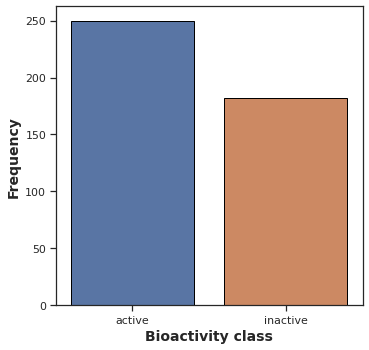

In [48]:
#Frequency plot of the 2 Bioactivity Classes
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=undersampled_data, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

# **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.



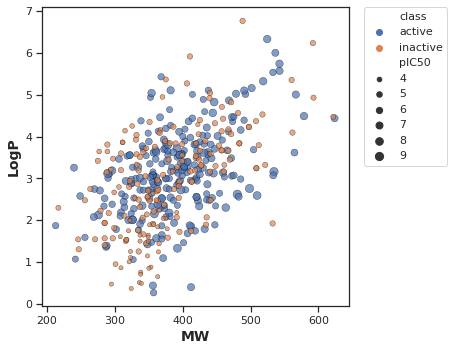

In [49]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=undersampled_data, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

Creating box plots to better visualize the data.


#### **For 2 classes**

**pIC50 value**

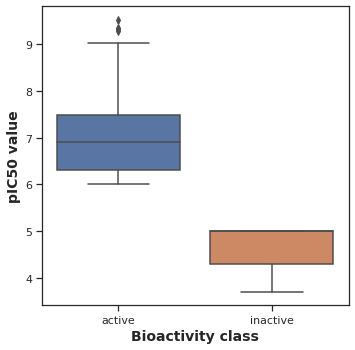

In [50]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = undersampled_data)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**MW**

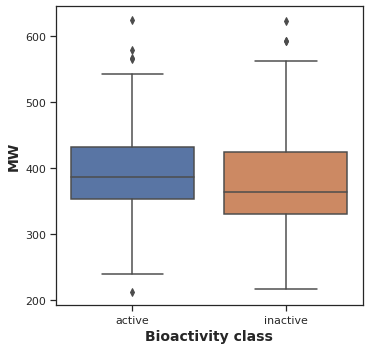

In [52]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = undersampled_data)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')
     

**LogP**

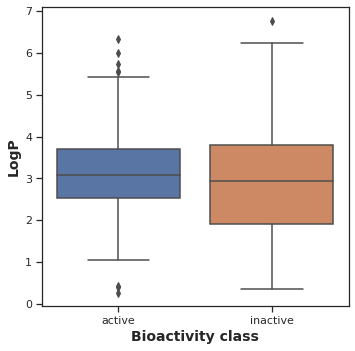

In [53]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = undersampled_data)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Number of H-Donors**

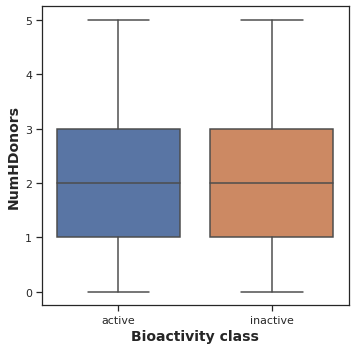

In [54]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = undersampled_data)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Number of H-Acceptors**

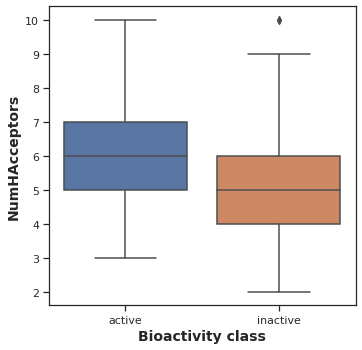

In [55]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = undersampled_data)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

#### **For 3 classes***

**pIC50**

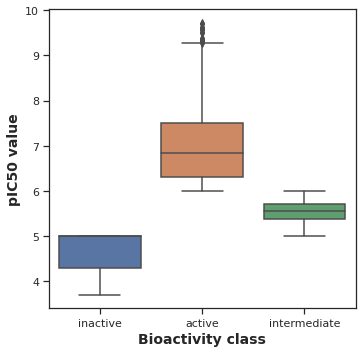

In [56]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**MW**

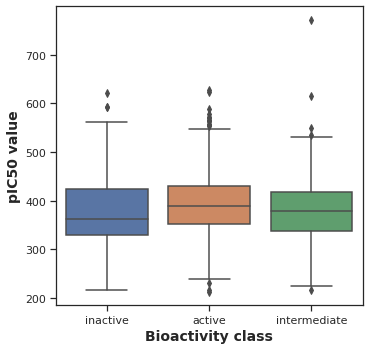

In [57]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**LogP**

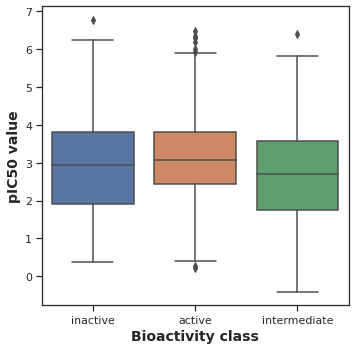

In [58]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**NumHDonor**

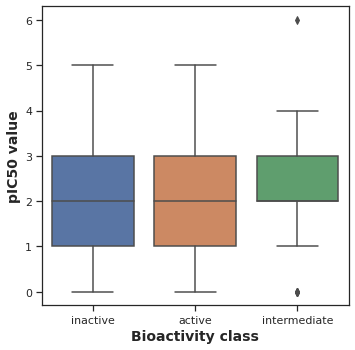

In [59]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**NumHAcceptors**

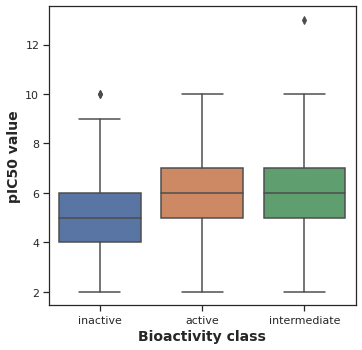

In [60]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

### **Statistical analysis | Mann-Whitney U Test**

**For 2 Classes**

The Mann-Whitney U test is a statistical method used to compare two groups of data that do not meet the requirements of other tests. It is used to find out if there is a significant difference between the medians of the two groups.

In [62]:
from scipy.stats import mannwhitneyu

def mannwhitney(descriptor, dataset=undersampled_data):
    # Get the values of the descriptor for the active and inactive classes
    active = undersampled_data[undersampled_data['class'] == 'active'][descriptor]
    inactive = undersampled_data[undersampled_data['class'] == 'inactive'][descriptor]
    
    # Use the Mann-Whitney U test to compare the samples
    stat, p = mannwhitneyu(active, inactive)
    
    # Determine the interpretation based on the p-value and significance level
    interpretation = 'Same distribution (fail to reject H0)' if p > 0.05 else 'Different distribution (reject H0)'
    
    # Store the results in a dictionary and return as a DataFrame
    results = {'Descriptor':descriptor, 'Statistics':stat, 'p':p, 'alpha':0.05, 'Interpretation':interpretation}
    return pd.DataFrame(results, index=[0])

mannwhitney('pIC50')
     


,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,45500.0,1.145361e-71,0.05,Different distribution (reject H0)


In [63]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,26318.0,0.005365,0.05,Different distribution (reject H0)


In [64]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,25278.0,0.048545,0.05,Different distribution (reject H0)


In [65]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,24498.5,0.150801,0.05,Same distribution (fail to reject H0)


In [66]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,28151.0,0.000016,0.05,Different distribution (reject H0)


### **For 3 Classes**
### **Kruskal-Wallis Test**
The Kruskal-Wallis test will also be tried for comparison.

The Kruskal-Wallis test is a non-parametric statistical test that compares the medians of three or more independent groups to determine whether the groups are significantly different from each other. It is used when the data violates the assumptions of normality and equal variances required by parametric tests such as ANOVA.

In [67]:
from scipy.stats import kruskal

def kruskal_wallis_test(descriptor, dataset=df_final):
    # Get the values of the descriptor for each group in the dataset
    groups = dataset.groupby('class')[descriptor].apply(list).values.tolist()
    
    # Use the Kruskal-Wallis test to compare the groups
    stat, p = kruskal(*groups)
    
    # Determine the interpretation based on the p-value and significance level
    interpretation = 'Same distribution (fail to reject H0)' if p > 0.05 else 'Different distribution (reject H0)'
    
    # Store the results in a dictionary and return as a DataFrame
    results = {'Descriptor':descriptor, 'Statistics':stat, 'p':p, 'alpha':0.05, 'Interpretation':interpretation}
    return pd.DataFrame(results, index=[0])

kruskal_wallis_test('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,880.695894,5.745352e-192,0.05,Different distribution (reject H0)


In [68]:
kruskal_wallis_test('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,15.377363,0.000458,0.05,Different distribution (reject H0)


In [69]:
kruskal_wallis_test('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,23.868359,0.000007,0.05,Different distribution (reject H0)


In [70]:
kruskal_wallis_test('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,5.894807,0.052476,0.05,Same distribution (fail to reject H0)


In [71]:
kruskal_wallis_test('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,29.259968,4.428724e-07,0.05,Different distribution (reject H0)


# **Interpretation**

**Mann-Whitney**

The first descriptor (pIC50) has a **different distribution** between the active and inactive compounds, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.

The other descriptors (MW, LogP, and NumHAcceptors) other NumHDonors than  have **different distributions** between the two groups.

**Kruskal-Wallis**

The first descriptor (pIC50) has a different distribution between the active, intermediate and inactive compounds, which is to be expected since threshold values were used to define actives and inactives.

The Hydrogen Donor discriptor showed **no significant difference** between classes while the other descriptors did showed a **significant difference** between the classes.

# **Part 3**

We will continue the model prediction since 3 of the 4 Lipinski descriptors have a difference between each class. Which can help tell the difference between bioactivity of the the compounds for TYK2.

We will be using only 2 bioactivity classes for this part. I will make another python notebook later for analyzing and predicting using the 3 bioactivity class

# **Descriptor Calculation and Dataset Preparation**

In [72]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh
! unzip padel.zip

--2023-03-03 02:01:42--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-03-03 02:01:43--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   152MB/s    in 0.2s    

2023-03-03 02:01:43 (152 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-03-03 02:01:43--  https://github

In [74]:
#load bioactivity data
df_new = pd.read_csv('TK2_05_bioactivity_data_3class_pIC50.csv')
df_new

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,1578,CHEMBL5076717,Cn1cc(Nc2nccc(N3CCC4(CCNC4=O)CC3)n2)cn1,active,327.392,1.06020,2.0,7.0,6.000000
1,1137,CHEMBL4285841,CNc1cc(Nc2cccc3c2OCCO3)nn2c(C(=O)NC3CC3)cnc12,active,380.408,2.17800,3.0,8.0,8.221849
2,738,CHEMBL3892159,CC1CC1NC[C@H]1CC[C@H](c2nnn3cnc4[nH]ccc4c23)CC1,active,324.432,2.87740,2.0,5.0,6.853872
3,550,CHEMBL3950680,Fc1ccc(CNC[C@H]2CC[C@H](c3nnn4cnc5[nH]ccc5c34)...,active,446.452,4.82710,2.0,5.0,8.481486
4,611,CHEMBL3962232,OCCOc1ccc(CN2CCC(c3nnn4cnc5[nH]ccc5c34)CC2)cc1,active,392.463,2.35630,2.0,7.0,6.000000
...,...,...,...,...,...,...,...,...,...
427,1414,CHEMBL4799683,Cn1cc(-c2cc(-c3cnn(C4(CC#N)CN(CC(F)(F)F)C4)c3)...,inactive,441.421,2.48018,0.0,9.0,5.000000
428,1448,CHEMBL4792719,COc1cccc(CN2CCC(Nc3c(C(=O)NC4CC4)cnc4[nH]ccc34...,inactive,419.529,3.54020,3.0,5.0,5.000000
429,1449,CHEMBL4784576,COc1cccc(CN2CCC(Nc3c(C(=O)NC4CCCC4)cnc4[nH]ccc...,inactive,447.583,4.32040,3.0,5.0,5.000000
430,1483,CHEMBL3651854,Cc1cc(Nc2nc(Nc3ccccc3S(=O)(=O)C(C)C)c3c(C)[nH]...,inactive,591.782,6.23544,3.0,9.0,5.000000


In [75]:
# Select the columns of interest
selection = ['canonical_smiles', 'molecule_chembl_id']
df_selection = df_new[selection]

# Save the selected columns to a smi file
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [76]:
#check the data
! cat molecule.smi | head -5

Cn1cc(Nc2nccc(N3CCC4(CCNC4=O)CC3)n2)cn1	CHEMBL5076717
CNc1cc(Nc2cccc3c2OCCO3)nn2c(C(=O)NC3CC3)cnc12	CHEMBL4285841
CC1CC1NC[C@H]1CC[C@H](c2nnn3cnc4[nH]ccc4c23)CC1	CHEMBL3892159
Fc1ccc(CNC[C@H]2CC[C@H](c3nnn4cnc5[nH]ccc5c34)CC2)cc1C(F)(F)F	CHEMBL3950680
OCCOc1ccc(CN2CCC(c3nnn4cnc5[nH]ccc5c34)CC2)cc1	CHEMBL3962232


In [77]:
#check data count
! cat molecule.smi | wc -l

432


### **Calculate fingerprint descriptors**


**Calculate PaDEL descriptors**

This will convert the smile notations into numerical representation that can be fed into the algorithm. The PaDel Descriptor will convert the notations

In [78]:
#displays the content of PaDEL
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [79]:
#runs the PaDEL script
! bash padel.sh

Processing CHEMBL5076717 in molecule.smi (1/432). 
Processing CHEMBL4285841 in molecule.smi (2/432). 
Processing CHEMBL3892159 in molecule.smi (3/432). Average speed: 3.96 s/mol.
Processing CHEMBL3950680 in molecule.smi (4/432). Average speed: 2.17 s/mol.
Processing CHEMBL3962232 in molecule.smi (5/432). Average speed: 1.93 s/mol.
Processing CHEMBL4160840 in molecule.smi (6/432). Average speed: 1.69 s/mol.
Processing CHEMBL1092925 in molecule.smi (7/432). Average speed: 1.97 s/mol.
Processing CHEMBL4278757 in molecule.smi (8/432). Average speed: 1.39 s/mol.
Processing CHEMBL1938654 in molecule.smi (9/432). Average speed: 1.38 s/mol.
Processing CHEMBL4125719 in molecule.smi (10/432). Average speed: 1.58 s/mol.
Processing CHEMBL4637587 in molecule.smi (11/432). Average speed: 1.26 s/mol.
Processing CHEMBL3973486 in molecule.smi (12/432). Average speed: 1.30 s/mol.
Processing CHEMBL3918875 in molecule.smi (13/432). Average speed: 1.08 s/mol.
Processing CHEMBL3957921 in molecule.smi (14/43

# **Preparing the X and Y Data Matrices**

**Creating the X Variable**

In [80]:
df_X = pd.read_csv('descriptors_output.csv')
df_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL5076717,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL4285841,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL3892159,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL3950680,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL3962232,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,CHEMBL4799683,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
428,CHEMBL4792719,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
429,CHEMBL4784576,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
430,CHEMBL3651854,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
df_X = df_X.drop(columns=['Name'])
df_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
428,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
429,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
430,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [82]:
df_X.shape

(432, 881)

**Y Variable**

In [83]:
df_Y = df_new['pIC50']
df_Y.head()

0    6.000000
1    8.221849
2    6.853872
3    8.481486
4    6.000000
Name: pIC50, dtype: float64

In [84]:
df_Y.shape

(432,)

# **Combine X and Y Variables**

In [85]:
dataset = pd.concat([df_X,df_Y], axis=1)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.000000
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.221849
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.853872
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.481486
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
428,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
429,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
430,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000


In [86]:
#save
dataset.to_csv('TK2_JAK1_06_bioactivity_data_3class_pIC50.csv')

# **Machine Learning Model Building**

In [87]:
#load previous data
data = pd.read_csv('TK2_JAK1_06_bioactivity_data_3class_pIC50.csv')
data

,Unnamed: 0,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.000000
1,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.221849
2,2,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.853872
3,3,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.481486
4,4,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,427,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.000000
428,428,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.000000
429,429,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.000000
430,430,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.000000


**Separate X and Y Variables again**

In [88]:
X = dataset.iloc[:, :-1]
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
428,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
429,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
430,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [89]:
Y = dataset.iloc[:,-1]
Y

0      6.000000
1      8.221849
2      6.853872
3      8.481486
4      6.000000
         ...   
427    5.000000
428    5.000000
429    5.000000
430    5.000000
431    4.900000
Name: pIC50, Length: 432, dtype: float64

**Removing low variance datas**


In [90]:
from sklearn.feature_selection import VarianceThreshold

# This function removes low variance features from the input data
# Features with variance below the given threshold are discarded

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP12,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP23,PubchemFP24,PubchemFP33,PubchemFP129,PubchemFP143,...,PubchemFP737,PubchemFP758,PubchemFP770,PubchemFP776,PubchemFP777,PubchemFP779,PubchemFP798,PubchemFP800,PubchemFP821,PubchemFP833
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,1,1,1,0,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,1,1,1,1,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,1,1,1,0,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
428,1,1,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
429,1,1,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
430,1,1,1,1,1,0,0,1,0,1,...,1,0,0,0,1,1,1,1,0,0


In [91]:
#convert dataset to csv
X.to_csv('descriptor_list.csv', index = False)

# **Random Forest Model**


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets, stratifying based on Y
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X_train, y_train)
r2 = model.score(X_test, y_test)
r2

0.6938598883950791

In [93]:
# Make predictions on the testing set
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

In [94]:
r21 = r2_score(y_test, predictions)
#Random Forest
print(f'Coefficient of determination (R^2): {r21} ')
print(f'Mean squared error (MSE): {mse}')
print(f'Mean absolute error (MAE): {mae}')


Coefficient of determination (R^2): 0.6938598883950791 
Mean squared error (MSE): 0.5293806394603929
Mean absolute error (MAE): 0.525841383048165


**Result**

The R^2 value of 0.6938598883950791 shows that 69.38% of the variability in the dependent variables in the dataset can be explained by the independent variables.

The MSE value of 0.5293806394603929 means that the average squared difference between the predicted and actual values is 0.53.

The MAE value of 0.525841383048165 means that the average absolute difference between the predicted and actual values is 0.53.

# **Result Visualization**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

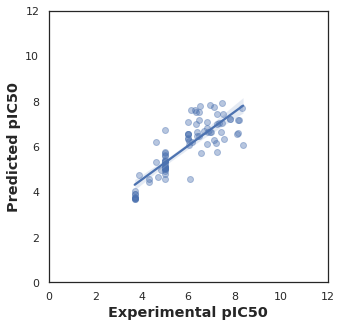

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(y_test, predictions, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

# **Comparing Models**

The Random Forest Model I used will be compared to other ML models using lazypredict in their performance.

In [96]:
! pip install lazypredict
! pip install seaborn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 255.9 MB 48 kB/s 
     |████████████████████████████████| 24.8 MB 1.3 MB/s 
     |████████████████████████████████| 2.0 MB 58.3 MB/s 
     |████████████████████████████████| 96 kB 5.8 MB/s 
     |████████████████████████████████| 297 kB 29.6 MB/s 
     |████████████████████████████████| 38.1 MB 268 kB/s 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 293 kB 4.9 MB/s 
     |████████████████████████████████| 11.2 MB 56.9 MB/s 
     |████████████████████████████████| 98 kB 8.8 MB/s 
     |████████████████████████████████| 1.1 MB 59.3 MB/s 
     |████████████████████████████████| 965 kB 47.3 MB/s 


In [97]:
import seaborn as sns
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [98]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:29<00:00,  1.43it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:25<00:00,  1.62it/s]


In [99]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.95,0.98,0.20,0.10
ExtraTreeRegressor,0.95,0.98,0.20,0.04
ExtraTreesRegressor,0.95,0.98,0.20,0.78
GaussianProcessRegressor,0.95,0.98,0.20,0.17
XGBRegressor,0.95,0.98,0.20,0.88
MLPRegressor,0.91,0.96,0.29,0.72
RandomForestRegressor,0.84,0.92,0.37,0.58
BaggingRegressor,0.77,0.89,0.45,0.20
HistGradientBoostingRegressor,0.77,0.89,0.45,4.20


In [100]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RANSACRegressor,121012880652317306650624.00,-130862766286808253726720.00,475698692015.51,1.40
Lars,3101922198611397.50,-3354404238033253.50,76160819.43,0.12
KernelRidge,20.84,-20.46,6.09,0.05
GaussianProcessRegressor,17.81,-17.18,5.61,0.18
QuantileRegressor,1.95,-0.02,1.33,1.96
Lasso,1.94,-0.01,1.32,0.03
LassoLars,1.94,-0.01,1.32,0.06
DummyRegressor,1.94,-0.01,1.32,0.03
DecisionTreeRegressor,1.85,0.08,1.26,0.08


**Results**

Based on the comparisons made by LazyPredict the Random Forest Algorithm did well on the training data (r^2 0.92) and the test data (r^2 0.69). Although the DecisionTreeRegressor (r^2 0.98) had the best performance for the training data and the GradientBoostingRegressor (r^2 0.72) did well on the test data.

# **Visualization of Model Performance**

[(0.0, 1.0)]

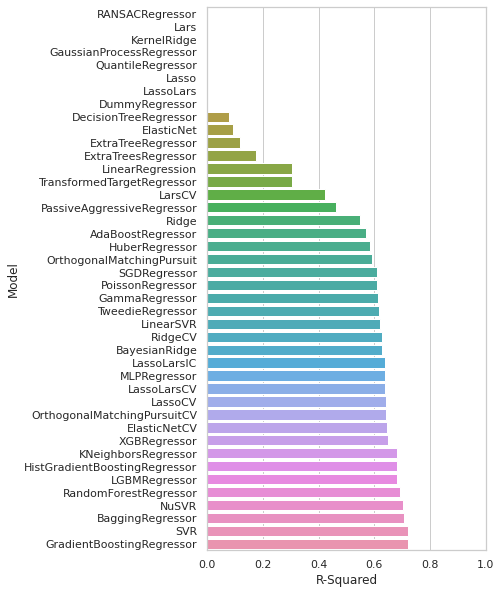

In [101]:
# Bar plot of R-squared values
#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="R-Squared", data=predictions_test)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

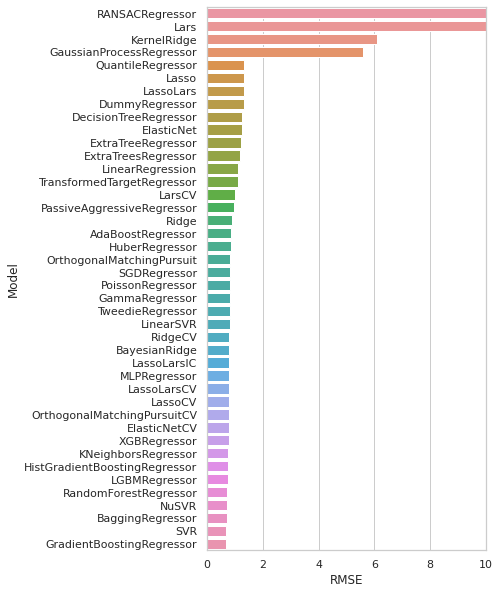

In [102]:
# Bar plot of RMSE values
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="RMSE", data=predictions_test)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

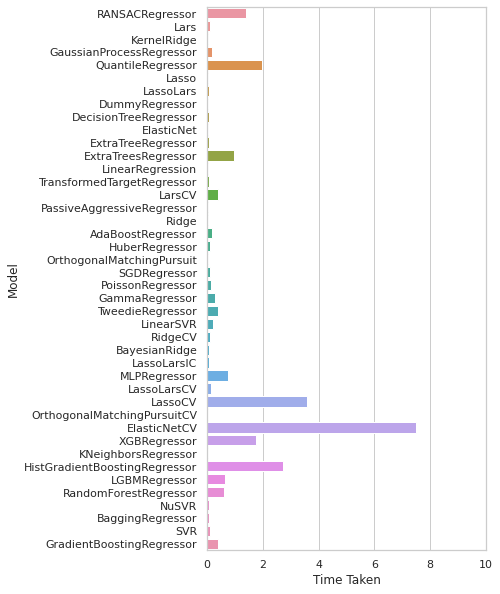

In [103]:
# Bar plot of calculation time

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="Time Taken", data=predictions_test)
ax.set(xlim=(0, 10))

# **My Takeaway from this project...**

After a lot of tinkering and trial and error, the model was able to perform a 69% accuracy for the prediction for inhibition for the target enzyme. I have undersampled the dataset since the data was extremely skewed to the active class of compounds which makes the predictions extremely inaccurate. It was fun learning a lot in this project and will keep doing a lot of projects for ML in the future.

In [104]:
#zip the files.

! zip -r results.zip . -i *.csv *.pdf

  adding: descriptor_list.csv (deflated 92%)
  adding: TK2_raw.csv (deflated 93%)
  adding: TK2_JAK1_04_bioactivity_data_3class_pIC50.csv (deflated 78%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: TK2_preprocessed02.csv (deflated 83%)
  adding: TK2_JAK1_06_bioactivity_data_3class_pIC50.csv (deflated 94%)
  adding: plot_MW.pdf (deflated 39%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: plot_bioactivity_class.pdf (deflated 39%)
  adding: TK2_05_bioactivity_data_3class_pIC50.csv (deflated 74%)
  adding: plot_NumHAcceptors.pdf (deflated 36%)
  adding: descriptors_output.csv (deflated 94%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: plot_MW_vs_LogP.pdf (deflated 6%)
  adding: TK2_preprocessed01.csv (deflated 81%)


In [105]:
#Export the file as a pickle file

import pickle
pickle.dump(model, open('Psoriasis_TK2_model.pkl', 'wb'))